# Overview of SVR

Support Vector Machine (SVM) is a very popular Machine Learning algorithm that is used in both Regression and Classification. Support Vector Regression is similar to Linear Regression in that the equation of the line is y= wx+b In SVR, this straight line is referred to as hyperplane. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors which is used to plot the boundary line.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value (Distance between hyperplane and boundary line), a. Thus, we can say that SVR model tries satisfy the condition -a < y-wx+b < a. It used the points with this boundary to predict the value.

![SVR.png](attachment:SVR.png)

For a non-linear regression, the kernel function transforms the data to a higher dimensional and performs the linear separation. Here we will use the rbf kernel.

In this example, we will go through the implementation of Support Vector Regression (SVR), in which we will predict the Marks of a student based on his or her number of hours put into study.

# Problem Analysis

In this data, we have one independent variable Hours of Study and one dependent variable Marks. In this problem, we have to train a SVR model with this data to understand the correlation between the Hours of Study and Marks of the student and be able to predict the student’s mark based on their number of hours dedicated to studies.

**Step 1: Importing the libraries**

In this first step, we will be importing the libraries required to build the ML model. The NumPy library and the matplotlib are imported. Additionally, we have imported the Pandas library for data analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Step 2: Importing the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We go through our dataset and assign the independent variable (x) to the column “Hours of Study” and the dependent variable (y) to the last column, which is the “Marks” to be predicted.

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudyData.csv')

In [4]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)

In [5]:
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


We use the corresponding .iloc function to slice the DataFrame to assign these indexes to X and Y. In this, the Hours of Study is taken as the independent variable and is assigned to X. The dependent variable that is to be predicted is the last column which is Marks and it is assigned to y. We will reshape the variable y to a column vector using reshape(-1,1).

**Step 3: Feature Scaling**

Most of the data that are available usually are of varying ranges and magnitudes which makes building the model difficult. Thus, the range of the data needs to be normalized to a smaller range which enables the model to be more accurate when training. In this dataset, the data is normalized between to small values near zero. For example, the score of 87.23092513 is normalized to 1.00475931 and score of 53.45439421 is normalized to -1.22856288.

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

Feature Scaling is mostly performed internally in most of the common Regression and Classification models. Support Vector Machine is not a commonly used class and hence the data is normalized to a limited range.

**Step 4: Training the Support Vector Regression model on the Training set**

In building any ML model, we always need to split the data into the training set and the test set. The SVR Model will be trained with the values of the training set and the predictions are tested on the test set. Out of 100 rows, 80 rows are used for training and the model is tested on the remaining 20 rows as given by the condition, test_size=0.2

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Step 5: Training the Support Vector Regression model on the Training set**

In this, the function SVM is imported and is assigned to the variable regressor. The kernel “rbf” (Radial Basis Function) is used. RBF kernel is used to introduce a non-linearity to the SVR model. This is done because our data is non-linear. The regressor.fit is used to fit the variables X_train and y_train by reshaping the data accordingly.

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Step 6: Predicting the Test set Results**

In this step, we are going to predict the scores of the test set using the SVR model built. Theregressor.predict function is used to predict the values for the X_test. We assign the predicted values to y_pred. We now have two data, y_test (real values) and y_pred (predicted values).

In [9]:
y_pred = regressor.predict(X_test.reshape(-1, 1))
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

**Step 7: Comparing the Test Set with Predicted Values**

In this step, we shall display the values of y_test as Real Values and y_pred values as Predicted Values for each X_test against each other in a Pandas DataFrame.

In [10]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test).reshape(-1).tolist(), 'Predicted Values':y_pred.reshape(-1).tolist()})
df

,Real Values,Predicted Values
0,31.707006,52.489792
1,97.379897,86.413192
2,81.536991,73.176384
3,72.247251,69.097299
4,69.847604,73.371201
5,59.108839,73.307710
6,74.765564,85.080197
7,77.768482,88.728610
8,85.232007,73.188106
9,60.723602,71.841720


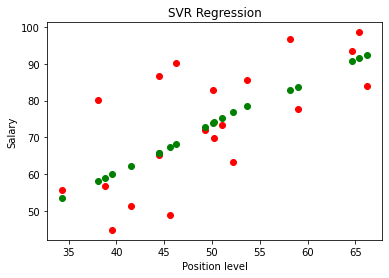

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test).reshape(-1,1), sc_y.inverse_transform(y_test.reshape(-1,1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

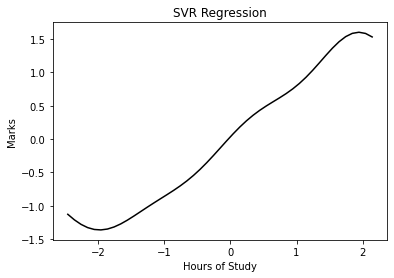

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

In this graph, the Real values are plotted in “Red” color and the Predicted values are plotted in “Green” color. The plot of the SVR model is also shown in “Black” color.